In [400]:
import pandas as pd

In [399]:
df = pd.read_csv('../data/sales.csv')

In [401]:
df.dropna(subset=['price'], inplace=True)

In [402]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [324]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year

train_raw = df[df.year < 2015].reset_index(drop=True)
test_raw = df[df.year >= 2015].reset_index(drop=True)

# 1. Dummy Transformer

<font color='red'>Question:</font> What are dummy variables?

Dummy variables are the main way that categorical variables are included as predictors in statistical and machine learning models. 

**Example:** Class to transform **product_level** to dummy variables. 

In [47]:
class Dummy_Transformer(object):
    
    def fit(self, X, y=None):
        self.keys = set(X)
    
    def transform(self, X, y=None):
        res = {}
        for key in self.keys:
            res[key] = [0]*len(X)    
        for i, item in enumerate(X):
            if item in self.keys:
                res[item][i] = 1
        return pd.DataFrame(res)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)        

In [48]:
dummytf = Dummy_Transformer()

In [199]:
dummytf.fit_transform(df.product_level).head()

,basic,advanced,unrated,super advanced,intermediate
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


<font color='red'>Assignment:</font> Wrap up the above dummy transformer with LinearRegression as pipeline to predict **price**. 

In [27]:
features = list(train_raw.columns)

target = 'price'

features.remove(target)
def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)

X_train = train_raw[features]
y_train = train_raw[target].map(price2num)


X_test = test_raw[features]
y_test = test_raw[target].map(price2num)


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
steps = [('dummytf', Dummy_Transformer()),
         ('poly', PolynomialFeatures(degree = 3)),
         ('rescale', MinMaxScaler()),
         ('lr',LinearRegression())]
model = Pipeline(steps)
model = model.fit(X_train, y_train)

In [32]:
y_train_pred = model.predict(X_train)


array([  354543.79778745, -8363792.20221255,   723183.79778745, ...,
         182511.79778745,   182511.79778745,   182511.79778745])

# 2. Frequence Transformer

<font color='red'>Assignment:</font> Write a class to replace the categorical values in **product_level** with their frequencies.

In [443]:

class Freq_Transformer(object):
    
    def fit(self, X, y=None):
        self.freq = dict(X.value_counts())
   
    def transform(self, X, y=None):  
        return X.map(lambda x: self.freq[x])
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X) 


In [445]:
df

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,2008
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,1997
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,2001
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm,2016
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
3192,NaN,"$93,349",3 Ton 0 Kg,Nov 25 2016,D,advanced,M14904,"IN732490,IN732338,IN732503,IN732435,IN732583",2.02 meters,112 cm,29 cm,2016
3193,NaN,"$40,384",2 Ton 830 Kg,May 25 2007,"J,B",intermediate,M14578,"IN732832,IN732166,IN733162,IN733785,IN732069,I...",2.15 meters,106 cm,28 cm,2007
3194,NaN,"$1,074,844",3 Ton 80 Kg,Dec 16 2016,C,intermediate,"M14883,M15011","IN733462,IN732654,IN732149,IN733067,IN734088,I...",2.84 meters,96 cm,25 cm,2016
3195,$44k,"$55,931",2 Ton 950 Kg,Apr 12 2002,R,advanced,M14341,IN732587,2.52 meters,100 cm,26 cm,2002


In [444]:
dfdrp = df[['price','product_level']].dropna()
y = dfdrp['price'].map(price2num)
freqtf = Freq_Transformer()
X = freqtf.fit_transform(dfdrp['product_level'])



<font color='red'>Assignment:</font> Plot the relationship between **product_level** frequencies and **price**.

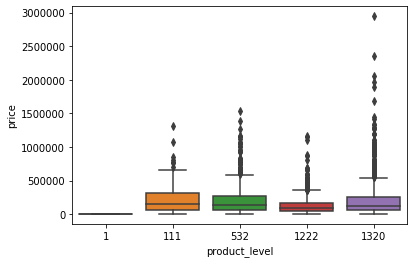

In [196]:
import matplotlib.pylab as plt
%matplotlib inline
new = pd.concat([X, y], axis=1)
sns.boxplot(x='product_level', y='price', data=new)


# 3. Ordinal Transformer

<font color='red'>Assignment:</font> The relationships between the values in **product_level** can be represented by ordinal numbers. Write a class to replace the level values with their ordinal numbers.

In [448]:
train_raw

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,2008
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,1997
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,2001
3,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,2000
4,$59k,"$60,320",2 Ton 930 Kg,Aug 19 2011,H,super advanced,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",2.71 meters,96 cm,25 cm,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
2752,$254k,"$255,179",3 Ton 40 Kg,Apr 20 2012,D,intermediate,M14261,"IN732220,IN732456,IN733681,IN732831,IN733123,I...",2.02 meters,113 cm,30 cm,2012
2753,$91k,"$144,631",2 Ton 890 Kg,Jul 12 2002,D,advanced,M14904,"IN732503,IN732583,IN732373,IN732338,IN732347,I...",2.52 meters,99 cm,26 cm,2002
2754,NaN,"$40,384",2 Ton 830 Kg,May 25 2007,"J,B",intermediate,M14578,"IN732832,IN732166,IN733162,IN733785,IN732069,I...",2.15 meters,106 cm,28 cm,2007
2755,$44k,"$55,931",2 Ton 950 Kg,Apr 12 2002,R,advanced,M14341,IN732587,2.52 meters,100 cm,26 cm,2002


In [449]:
class Ord_Transformer(object):
    
    def fit(self, X, y=None):
        self.ord = {'unrated':0, 'basic':1, 'intermediate':2, 'advanced':3, 'super advanced':4}
        
    def transform(self, X, y=None):  
        return X.map(lambda x: self.ord[x])
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X) 

In [315]:
ordtf = Ord_Transformer()

In [450]:
dfdrp = df[['price','product_level']].dropna()
y = dfdrp['price'].map(price2num)
ordtf.fit_transform(dfdrp.product_level).head()
X = ordtf.fit_transform(dfdrp['product_level'])


<font color='red'>Assignment:</font> Plot the relationship between **product_level** ordinal numbers and **price**.

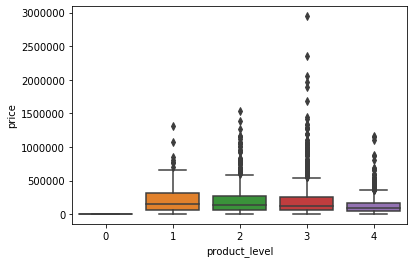

In [451]:
import matplotlib.pylab as plt
%matplotlib inline
new = pd.concat([X, y], axis=1)
sns.boxplot(x='product_level', y='price', data=new)


# 4. Text Vectorization

Column **ingredient** is more complex. There are missing values. And also many rows contains multiple ingredients.

## 4.1 Missing values

<font color='red'>Assignment:</font> In **train_raw**, impute the missing values in **ingredient** as **unknown_ingredient**, and assign the imputed **ingredient** to a variable **train_imputed_ingredient**.

In [410]:
train_imputed_ingredient=train_raw['ingredient'].fillna(value="unknown_ingredient")


<font color='red'>Questions:</font> What are other ways to impute or handle missing categorical values? What are the good ways to handle different amounts of missing categorical values, like a few lines, a small fraction (say 2%), a considerable fraction (say 30%), and majority (say 95%)?

**Example:** Import **CountVectorizer**

In [406]:
from sklearn.feature_extraction.text import CountVectorizer

<font color='red'>Assignment:</font> Fit and transform **train_imputed_ingredient** using **CountVectorizer**. Assign the output to **X_train**.

In [414]:

cv = CountVectorizer()
#train_imputed_ingredient
X_train = cv.fit_transform(train_imputed_ingredient)


<font color='red'>Assignment:</font> Get the type and shape of **X_train**. 

In [416]:
type(X_train)

scipy.sparse.csr.csr_matrix

<font color='red'>Question:</font> What is a sparse matrix?

 The sparse matrix representation outputs the row-column tuple where the matrix contains non-zero values along with those values.

**Example**: Assign the output of **ingredient** generated with **CountVectorizer** to a DataFrame named **train_ingredient_df**, name the columns with features. 

In [417]:
train_ingredient_df = pd.DataFrame(X_train.todense())
train_ingredient_df = train_ingredient_df.rename(columns={v: k for k, v in cv.vocabulary_.items()})
train_ingredient_df.head()

,in732052,in732053,in732054,in732055,in732056,in732057,in732058,in732059,in732060,in732061,...,in734073,in734074,in734075,in734076,in734079,in734080,in734081,in734086,in734087,unknown_ingredient
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<font color='red'>Assignment:</font> Train a new model using **Pipeline** to wrap up **CountVectorizer** and **LinearRegression** to predict **price**, and get both the train and test scores.

In [452]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year

train_raw = df[df.year < 2015].reset_index(drop=True)
test_raw = df[df.year >= 2015].reset_index(drop=True)

X_train=train_raw['ingredient'].fillna(value="unknown_ingredient")

X_train
#y_train

0                                       IN732052,IN732053
1            IN732054,IN732055,IN732056,IN732057,IN732058
2                              IN732054,IN732059,IN732060
3                              IN732064,IN732065,IN732066
4       IN732067,IN732068,IN732069,IN732070,IN732071,I...
                              ...                        
2752    IN732220,IN732456,IN733681,IN732831,IN733123,I...
2753    IN732503,IN732583,IN732373,IN732338,IN732347,I...
2754    IN732832,IN732166,IN733162,IN733785,IN732069,I...
2755                                             IN732587
2756                                   unknown_ingredient
Name: ingredient, Length: 2757, dtype: object

In [431]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


steps = [('cv', CountVectorizer()),
         ('lr', LinearRegression())]
model = Pipeline(steps)
model = model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)

In [435]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.53e+05
train MSE: 1.89e+11
train R2: -3.433


In [438]:
X_test=test_raw['ingredient'].fillna(value="unknown_ingredient")
X_test

0                             IN732061,IN732062,IN732063
1           IN732088,IN732089,IN732090,IN732091,IN732092
2      IN732121,IN732122,IN732126,IN732134,IN732135,I...
3                                     unknown_ingredient
4                                      IN732118,IN732240
                             ...                        
424         IN732650,IN732433,IN732336,IN732386,IN733795
425                           IN733176,IN734084,IN732282
426    IN732755,IN732652,IN732077,IN732536,IN732330,I...
427         IN732490,IN732338,IN732503,IN732435,IN732583
428    IN733462,IN732654,IN732149,IN733067,IN734088,I...
Name: ingredient, Length: 429, dtype: object

In [437]:
y_test

0       229174.0
1       168762.0
2       605022.0
3         4444.0
4        17932.0
         ...    
424     107358.0
425      47939.0
426     491055.0
427      93349.0
428    1074844.0
Name: price, Length: 429, dtype: float64

In [441]:
y_test_pred = model.predict(X_test)

In [442]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 4.65e+05
test MSE: 5.47e+11
test R2: -5.347
